<a href="https://colab.research.google.com/github/al34n1x/DataScience/blob/master/99.Machine_Learning/19_naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Naive Bayes



## Teorema de Bayes



<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/18/Bayes%27_Theorem_MMB_01.jpg/1024px-Bayes%27_Theorem_MMB_01.jpg">
El teorema de Bayes (o Ley de Bayres o Regla de Bayes) se considera una de las reglas más poderosas en el cálculo de probabilidades y estadística.
Describe la probabilidad de un evento, basado en conocimiento previo de condiciones que podrían estar relacionadas con el evento.

 
<img src="https://miro.medium.com/max/1994/1*CnoTGGO7XeUpUMeXDrIfvA.png">

<img src="https://www.saedsayad.com/images/Bayes_rule.png">


- P(c|x) es la probabilidad a posteriori de la clase c dado los predictores x.
- P(c) es la probabilidad a priori de la clase.
- P(x) es la probabilidad a priori del predictor (o predictores).
- P(x|c) es la probabilidad del predictor, dada la clase (*likelihood*).



## Naive Bayes



Los algoritmos de Naive Bayes son algoritmos de aprendizaje supervisado basados en la aplicación del Teorema de Bayes con una suposición *naive* (inocente): **asume independencia** entre cada par de variables de predicción.



- Uso más común: como algoritmo de clasificación. Predice la clase de los datos.
- Ventaja de Naive Bayes: es relativamente rápido comparado con otros algoritmos de clasificación.
- Útil con datasets grandes.
- Aplicaciones: predicciones en tiempo real, predicciones multiclase, clasificación de textos / filtrado de spam / analisis de sentimientos, sistema de recomendaciones...



### Naive Bayes con Scikit Learn



Los diferentes algoritmos de Naive Bayes difieren en las suposiciones relativas a la distribución de las variables continuas predictoras.

En **Scikit** Learn tenemos:
- **GaussianNB**: implementa el algoritmo Gaussian Naive Bayes para clasificación. Asume que la distribución de los datos es gaussiana (normal).
- **MultinomialNB**: implementa el algoritmo de naive Bayes para datos dcon una distribución multinomial. Útil cuando las variables son discretas.
- **BernoulliNB**: impelmenta naive Bayes para datos con una distribución de Bernoulli multivariante. Útil cuando las variables son binarias.



Antes de utilizar un modelo, deberíamos verificar si la distribución de las variables sigue uno de los tres modelos recien mencionados. Porque si no lo hiciese, podríamos ver que las distribuciones no ajustan bien los datos.

Si las variables no siguen una distribución normal por ejemplo, podríamos usar transformaciones u otros métodos para convertirlas en una distribución normal.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# Local
data = pd.read_csv("https://github.com/al34n1x/DataScience/raw/master/data/titanic_ok.csv")

In [3]:
data.shape

(1309, 14)

In [4]:
data.dropna(inplace= True, subset={'fare'})

In [5]:
data.shape

(1308, 14)

In [6]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,Allen. Miss. Elisabeth Walton,female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,St Louis. MO
1,1,1,Allison. Master. Hudson Trevor,male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,Montreal. PQ / Chesterville. ON
2,1,0,Allison. Miss. Helen Loraine,female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,Montreal. PQ / Chesterville. ON
3,1,0,Allison. Mr. Hudson Joshua Creighton,male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,Montreal. PQ / Chesterville. ON
4,1,0,Allison. Mrs. Hudson J C (Bessie Waldo Daniels),female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,Montreal. PQ / Chesterville. ON


In [7]:
CAge=pd.cut(data["age"], bins = [0,10,18,40,max(data["age"])] ,labels=["Child","MYoung","Young","Older"])

#create dummy variables for the column
dummies = pd.get_dummies(CAge)

In [8]:
dummies.head()

,Child,MYoung,Young,Older
0,0,0,1,0
1,1,0,0,0
2,1,0,0,0
3,0,0,1,0
4,0,0,1,0




En la versión 0.19.0 de pandas es necesario un paso adicional

In [9]:
#dummies_tmp = pd.get_dummies(CAge)
#dummies = pd.DataFrame(data = dummies_tmp.values,
#                       index = dummies_tmp.index)
#dummies.index.name="PassengerId"



añadimos las variables *dummy*

In [10]:
data = data.join(dummies)

In [11]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,Child,MYoung,Young,Older
0,1,1,Allen. Miss. Elisabeth Walton,female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,St Louis. MO,0,0,1,0
1,1,1,Allison. Master. Hudson Trevor,male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,Montreal. PQ / Chesterville. ON,1,0,0,0
2,1,0,Allison. Miss. Helen Loraine,female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,Montreal. PQ / Chesterville. ON,1,0,0,0
3,1,0,Allison. Mr. Hudson Joshua Creighton,male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,Montreal. PQ / Chesterville. ON,0,0,1,0
4,1,0,Allison. Mrs. Hudson J C (Bessie Waldo Daniels),female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,Montreal. PQ / Chesterville. ON,0,0,1,0


In [12]:
data['sex'] = data['sex'].replace(to_replace=['male', 'female'], value=[0, 1])

In [13]:
train, test = train_test_split(data, test_size=0.5)

survived = train[(train.survived==1)]

In [14]:
train.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,Child,MYoung,Young,Older
226,1,0,Pears. Mr. Thomas Clinton,0,29.0,1,0,113776,66.6000,C2,S,NaN,NaN,Isleworth. England,0,0,1,0
1212,3,0,Slabenoff. Mr. Petco,0,NaN,0,0,349214,7.8958,NaN,S,NaN,NaN,NaN,0,0,0,0
468,2,0,Karnes. Mrs. J Frank (Claire Bennett),1,22.0,0,0,F.C.C. 13534,21.0000,NaN,S,NaN,NaN,India / Pittsburgh. PA,0,0,1,0
1058,3,0,Nieminen. Miss. Manta Josefina,1,29.0,0,0,3101297,7.9250,NaN,S,NaN,NaN,NaN,0,0,1,0
771,3,1,Devaney. Miss. Margaret Delia,1,19.0,0,0,330958,7.8792,NaN,Q,C,NaN,Kilmacowen. Co Sligo. Ireland New York. NY,0,0,1,0




## Prediciendo con la variable Fare

Text(0.5, 1.0, 'People who survived')

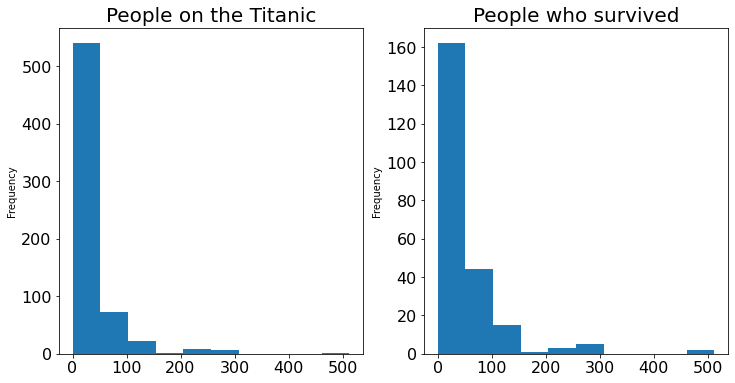

In [15]:
fig7, axs7 = plt.subplots(1,2)

train['fare'].plot.hist(ax=axs7[0], figsize=(12, 6), fontsize=16)
survived['fare'].plot.hist(ax=axs7[1], fontsize=16)

axs7[0].set_title("People on the Titanic", fontsize=20)
axs7[1].set_title("People who survived", fontsize=20)

In [16]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

In [17]:
gnb = GaussianNB()

used_features = ['fare']

y_pred = gnb.fit(train[used_features], train["survived"])

y_pred = gnb.predict(test[used_features])



Accuracy

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix

acc = accuracy_score(test["survived"], y_pred)
acc

0.6345565749235474

In [19]:
print(confusion_matrix(test["survived"], y_pred))

[[375  11]
 [228  40]]




## Prediciendo con la variable Age

Text(0.5, 1.0, 'People who survived')

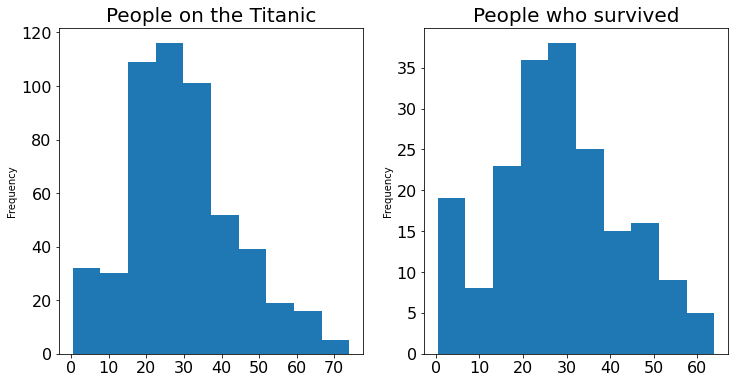

In [20]:
fig3, axs3 = plt.subplots(1,2)

train['age'].plot.hist(ax=axs3[0], figsize=(12, 6), fontsize=16)
survived['age'].plot.hist(ax=axs3[1], fontsize=16)

axs3[0].set_title("People on the Titanic", fontsize=20)
axs3[1].set_title("People who survived", fontsize=20)

In [21]:
used_features = ["Child","Young","Older","MYoung"]

In [22]:
gnb = BernoulliNB()

y_pred = gnb.fit(train[used_features], train["survived"])

y_pred = gnb.predict(test[used_features])

acc = accuracy_score(test["survived"], y_pred)
acc

0.6039755351681957

In [23]:
print(confusion_matrix(test["survived"], y_pred))

[[369  17]
 [242  26]]




## Prediciendo con la variable Sex

Text(0.5, 1.0, 'People who survived')

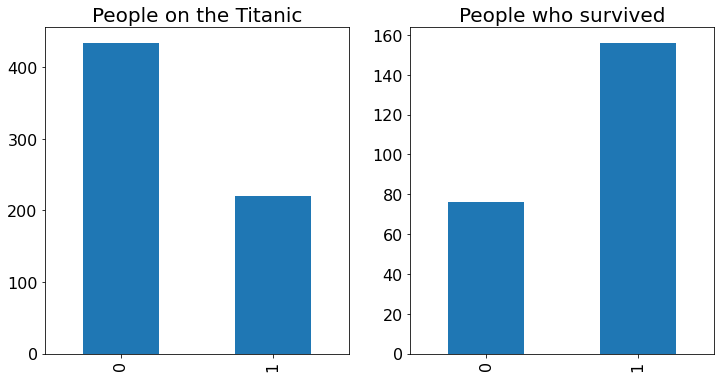

In [24]:
fig2, axs2 = plt.subplots(1,2)

train['sex'].value_counts().sort_index().plot.bar(ax=axs2[0], figsize=(12, 6), fontsize=16)
survived['sex'].value_counts().sort_index().plot.bar(ax=axs2[1], fontsize=16)

axs2[0].set_title("People on the Titanic", fontsize=20)
axs2[1].set_title("People who survived", fontsize=20)


In [25]:
used_features = ["sex"]

gnb = BernoulliNB()

y_pred = gnb.fit(train[used_features], train["survived"])

y_pred = gnb.predict(test[used_features])

acc = accuracy_score(test["survived"], y_pred)
acc


0.7737003058103975

In [26]:
print(confusion_matrix(test["survived"], y_pred))

[[323  63]
 [ 85 183]]




## Notas

- Remover las variables correlacionadas puede mejorar el modelo
- Laplace Correction: si una variable categórica (en los datos de test), tiene una categoría no observada en los datos de entrenamiento, el modelo le asignará una probabilidad de 0, y no podrá hacer una predicción. A esto se le llama *Zero Frequency*. Para remediarlo podemos usar una técnica llamada estimación de Laplace. 



# Naive Bayes casos prácticos

Veamos algunos ejemplos aplicando el teorema de Bayes



<center><img src="https://www.saedsayad.com/images/Bayes_rule.png"></center>



Supongamos unos datos como los de la imagen inferior, en la que tenemos las condiciones metereológicas (Weather) y la variable a predecir (Play) que representa el que un equipo salga a jugar o no.



<center><img src="https://www.saedsayad.com/images/naive_bayes_data.png"></center>



El primer caso consiste en convertir los datos anteriores a una tabla de frecuencia y luego creamos las tablas de likelihood, donde tenemos las probabilidades de cada weather y de Play (Yes/No)



Mediante estas tablas y  Naive Bayes podemos calcular la probabilidad por ejemplo de si se **jugará (Play=YES) si el tiempo es Sunny**. En nuestro caso, quedaría así la ecuación planteda inicialmente:


                             P(Yes | Sunny) = P( Sunny | Yes) * P(Yes) / P (Sunny)
                                                        
                                                        
Donde tenemos, de las tablas anteriores:

                                         P (Sunny |Yes) = 3/9 = 0.33
                                         P(Sunny) = 5/14 = 0.36
                                         P(Yes)= 9/14 = 0.64

Lo que nos queda sustituyendo:
                                                                 
                                 P (Yes | Sunny) = 0.33 * 0.64 / 0.36 = 0.60
                                                                 




<center><img src="https://www.saedsayad.com/images/Bayes_3.png"></center>



# Ejercicio 

El teorema de Naive Bayes se encuentra implementado en scikit-learn:

In [27]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB



Con lo que se puede podemos construir un clasificador de correo ham/spam que obtiene buenos resultados.

Dado el dataset 'data/spam.csv', construya un clasificador de correo con el que predecir si el correo es ham o spam.


Nota: La estructura inicial del dataset consiste en el contenido del correo y una etiqueta que lo identifica como ham/spam. Es necesario transformar el contenido del correo en variables numéricas que representen la frecuencia de aparición de cada término en el dataset.

Esta transformación se puede realizar mediante el siguiente código:



Dividimos el conjunto de datos iniciales en train y test, con 10% de test

In [28]:
# Respuesta aqui



convertimos la estructura de texto en términos de frecuencia  de cada término

In [29]:
# Respuesta aqui



seleccionamos aquellos términos más frecuentes

In [30]:
# Respuesta aqui



- a. Construya un clasificador con sklearn usando las distintas opciones (GaussianNB, MultinomialNB, BernoulliNB) y evalúe el resultado mediante la accuracy y la matriz de confusión:

from sklearn.metrics import accuracy_score, confusion_matrix


In [31]:
# Respuesta aqui

In [32]:
# Respuesta aqui

In [33]:
# Respuesta aqui